In [24]:
#loading Packages
library(tidyverse)
library(repr)
library(digest)
install.packages("infer")
library(infer)
set.seed(123)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)



**PROJECT PROPOSAL**


Group 14


Contributors: Hancheng Zhang, Daisy Liu, Aparna Varma

**CHRONIC KIDNEY DISEASE AND ALBUMIN PRODUCTION**

### **INTRODUCTION**

Chronic Kidney Disease (CKD) is known to be the cause of many health conditions, such as eating disorder，kidney failure and various heart diseases.(NIH, 2021). In our research, we would like to find out the impact that CKD has on the production of albumin compared to various other diseases, albumin is a protein produced by the liver which plays crucial roles in the immune system and keeping fluids within blood vessels. The albumin level in a healthy individual is about 3.4 to 5.4 g/dL(Dugdale, D. C. 2021), the maintainance of this level is needed for the proper transportation of nutrients in the human body. 


In this report, we will use a dataset which comes form UCI machine Learning Repository contributed by Dr.P.Soundarapandian.M.D.,D.M (Senior Consultant Nephrologist), Apollo Hospitals. This data contains about 300+ observations of CKD patients as well as patients with various other conditions. Out of the 24 documented measurements of health factors, we will be focusing on the investigation of albumin levels in CKD & non-CKD patients(some other health condition may take into consideration later). We would like to examine the albumin level of patients to figure out CKD's impact on liver function compared to other non-CKD patients, we will do so by comparing the mean albumin levels of CKD patients with patients without CKD. Aside from this, we will also conduct a brief analysis on the impact of appetite on albumin levels, we hope to establish more connection between the three examined variables by the end of our final report.

Using this data set and our preliminary analysis, the question we want to ask is **“Can we reliably claim that patients with chronic kidney disease have higher levels of albumin compared to patients without chronic kidney disease?”**

### **Method and Results**

This dataset contains a large amount of observations (about 300+), specifically, if we are to compare patients with / without CKD, we can also use the CLT for generating hypothesis tests and confidence intervals:

In [23]:
#calculating number of oberservations for CKD & non-CKD patients 
sample_sizes <- ckd_data %>%
    select(classification)%>%
    group_by(classification)%>%
    summarize(count = n())

sample_sizes

classification,count
<chr>,<int>
ckd,206
notckd,143


The primary question that this report strives to answer is whether it is justified to claim that people with chronic kidney disease have higher albumin levels as against people without the disease. 
For the preliminary aspect of the proposal, we found out that upon plotting a sample distribution for albumin levels, the mean albumin levels of CKD patients are higher than patients without CKD thereby substantiating our initial question and laying valid grounds for further analysis. 

We also look at a patient’s appetite as a variable indicative of their albumin levels and see whether the respective sampling distribution corresponds to a patient’s classification of having CKD or not. 
The plots produced are from a sample which consists of patients having various illnesses, besides CKD, which makes it difficult to generalize statements for the entire sample since certain illnesses could affect albumin levels more compared to others


However, since this is only a sample of a larger population, we do not yet have the information needed to establish a specified range of confidence in our current conclusions.Thus we may generate a hypothesis test & a confidence interval to further support our research.

Null hypothesis (H0): μ1 (CKD)- μ2 (not CKD) = 0 

Alternative hypothesis (H1): μ1(CKD) - μ2(not CKD) > 0 

Our tentative significance level will be a = 0.05

We can obtain a 94% confidence interval for the difference between the means of patients with CKD vs patients without CKD using the CLT and assess its accuracy by comparing it to the observed test statistic value

Based on the preliminary results, we observed that the test statistic (difference of the two means) is greater than 0, we have the tentative expectation that the rejection of H0 being is probable at our indicated significance level. 

Such findings can help a patient or medical practitioners to accurately correlate albumin levels to illnesses and their symptoms, and take subsequent steps to identify and curtail them. 

If the null hypothesis is rejected, this would indicate that CKD patients do have higher albumin levels than patients with other diseases documented by the data. This could lead to more effective allocations of treatments for albumin levels.

The findings of this project may lead to future studies on whether certain diseases, some of which are included in our data set, may lead to lower albumin levels which could potentially have some impact on liver function. It may also raise questions as to what are the key characteristics of the illnesses which leads to significantly lower albumin levels and how does CKD differ from these characteristics. 

In [11]:

#reading the data
dataset <- read.csv("https://raw.githubusercontent.com/mish-salt/Group-14-stat-project/main/ckd.csv") 

#wrangling data
ckd_data <- dataset %>%
    rename(albumin_level = al, classification = class, appetite = appet)%>% #renaming columns
    select(albumin_level, classification, appetite, pe)%>% #selecting relevant variables
    mutate(albumin_level = as.numeric(albumin_level))%>%#change chr into dbl for albumin_level
    mutate(appetite = as.factor(appetite)) #appetite may be another interesting variable to look at - even if not included in the final results
    

head(ckd_data)



,albumin_level,classification,appetite,pe
,<dbl>,<chr>,<fct>,<chr>
1,2,ckd,good,no
2,5,ckd,good,no
3,3,ckd,poor,no
4,5,ckd,poor,yes
5,3,ckd,good,no
6,4,ckd,good,yes


In [12]:
#for the sake of interest - look at the sum of albumin level in respect to appetite

appetite <- ckd_data %>%
    select(appetite, albumin_level)%>%
    group_by(appetite)%>%
    summarize(mean = mean(albumin_level))

head(appetite)


appetite,mean
<fct>,<dbl>
good,1.779359
poor,3.000000


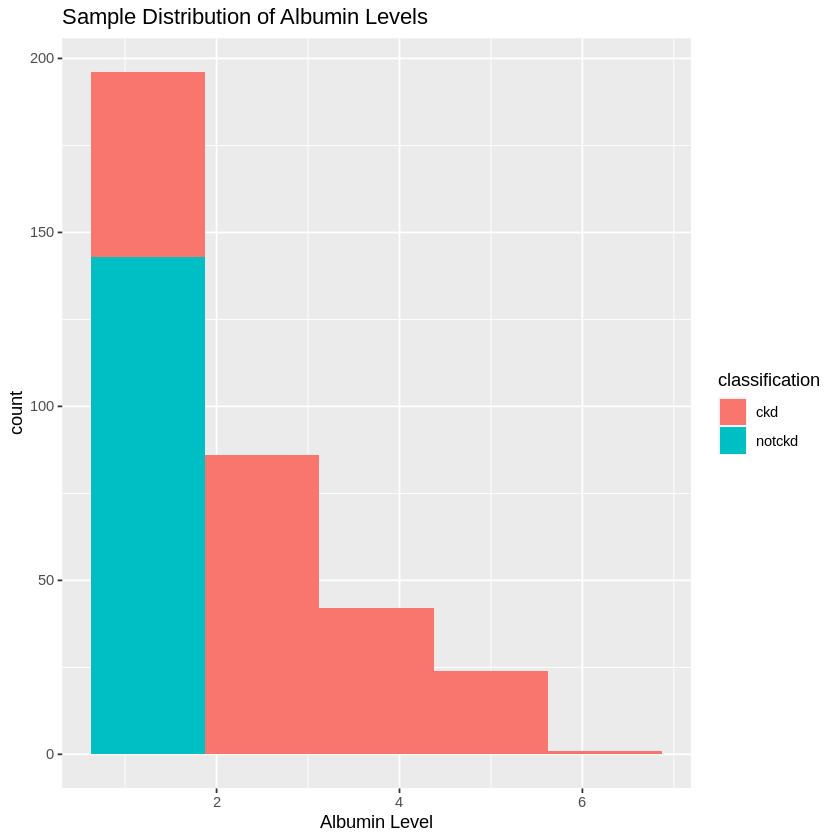

In [13]:
#plotting the sample distribution for albumin with indications of ckd classification
albumin_plot_ckd <- ckd_data %>%
    ggplot(aes(x = albumin_level))+
    geom_histogram(bins = 5, aes(fill = classification))+
    xlab("Albumin Level")+
    ggtitle("Sample Distribution of Albumin Levels")

albumin_plot_ckd

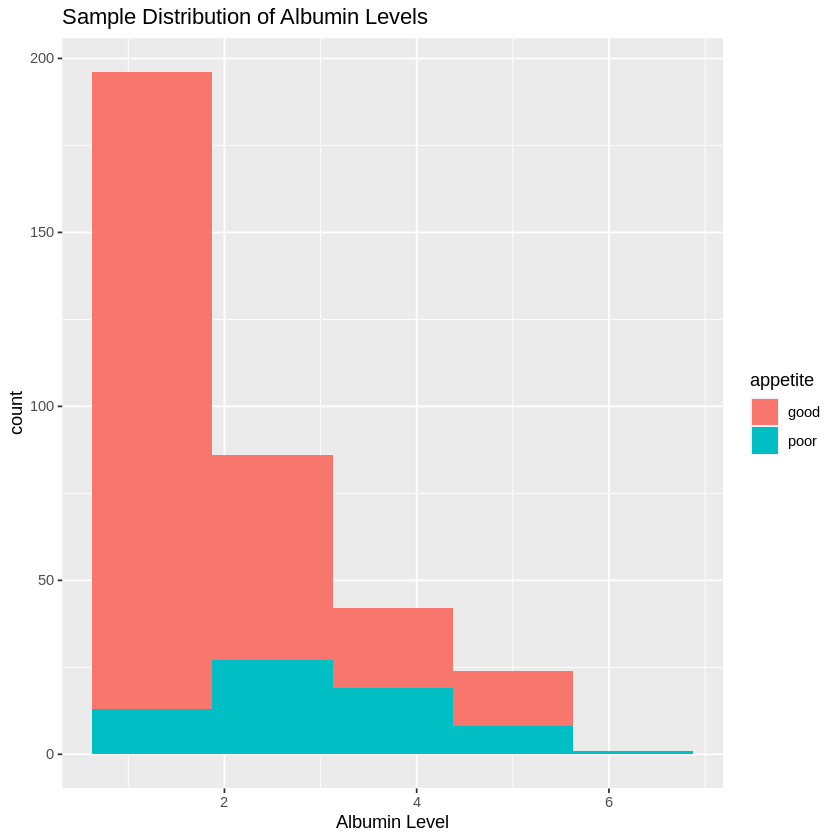

In [14]:
#plotting the sample distribution for albumin with indications of appetite
albumin_plot_ckd <- ckd_data %>%
    ggplot(aes(x = albumin_level))+
    geom_histogram(bins = 5, aes(fill = appetite))+
    xlab("Albumin Level")+
    ggtitle("Sample Distribution of Albumin Levels")

albumin_plot_ckd

In [15]:
#computing point estimates(mean)
xbar <- ckd_data %>%
    select(classification, albumin_level)%>%
    group_by(classification)%>%
    summarize(mean = mean(albumin_level))

xbar

classification,mean
<chr>,<dbl>
ckd,2.723301
notckd,1.000000


In [16]:
#computing observed test statistic (difference in mean)
diff <- xbar%>%
    mutate(diff = mean[1] - mean[2])%>%
    select(diff)%>%
    head(1)%>%
    pull()

diff

[1] 1.723301

#### **Bootstrasp approach**

In [17]:
# use bootstrap method to simulate 1000 sample mean difference between two groups
null_model_ckd <-
    ckd_data %>%
    specify(formula = albumin_level ~ classification) %>%
    hypothesize(null = "independence") %>%
    generate(reps = 1000, type = "permute") %>%
    calculate(stat = "diff in means", order = c("ckd", "notckd"))

head(null_model_ckd)

replicate,stat
<int>,<dbl>
1,0.05282097
2,-0.05380542
3,-0.07750017
4,-0.08934755
5,0.01727884
6,0.24237898


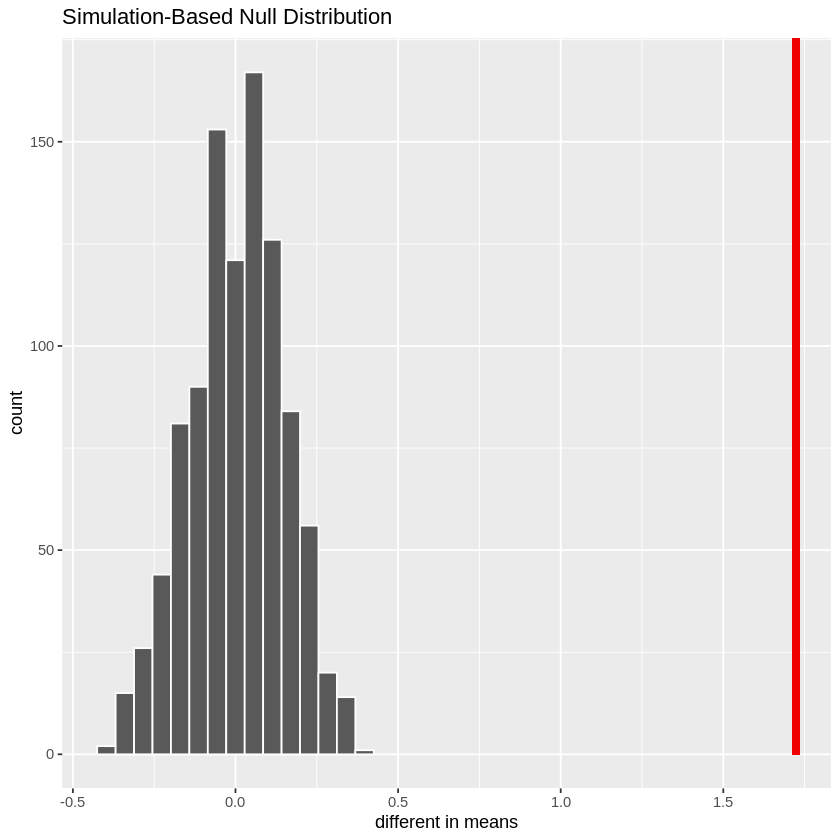

In [18]:
ckd_result_plot <- 
    null_model_ckd %>%
    visualize() + 
    shade_p_value(obs_stat = diff, direction = "right")+
    xlab("different in means")

ckd_result_plot

In [19]:
#get the p value
p_value <-p_value_infer <- 
    null_model_ckd %>% 
    get_p_value(obs_stat = diff, direction = "right")

p_value

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


p_value
<dbl>
0


#### **CTL method**

In [20]:
#get means and sds of ckd/notckd groups
ckd_data_summary <- 
    ckd_data %>% 
    group_by(classification) %>% 
    summarise(sample_mean = mean(albumin_level),
              sample_std_error = sd(albumin_level)/sqrt(n()))

ckd_data_summary

classification,sample_mean,sample_std_error
<chr>,<dbl>,<dbl>
ckd,2.723301,0.09575753
notckd,1.000000,0.00000000


In [22]:
#calculate the confidence interval
ckd_mean <- ckd_data_summary$sample_mean[1]
ckd_var <- ckd_data_summary$sample_std_error[1]^2
notckd_mean <- ckd_data_summary$sample_mean[2]
notckd_var <- ckd_data_summary$sample_std_error[2]^2

ckd_clt_ci <- 
    tibble(lower_ci = (ckd_mean - notckd_mean - qnorm(0.97) * sqrt(notckd_var + ckd_var)),
           upper_ci = (ckd_mean - notckd_mean + qnorm(0.97) * sqrt(notckd_var + ckd_var)))

head(ckd_clt_ci)

lower_ci,upper_ci
<dbl>,<dbl>
1.543201,1.903401


**EXPLAINATIONS ON PRELIMINARY RESULTS**

- The albumin levels in the dataset are documented as integers rather than continuous values, interpretations of these values should be seen as relative rather than precise

- Aside from the classification of Chronic Kidney Disease (CKD), the dataset includes the indications for various diseases and conditions, including:

1. Hypertension
2. Diabetes Mellitus
3. Coronary Artery Disease
4. Pedal Edema
5. Anemia

these diseases and conditions may also affect the production of albumin 

- From the preliminary results it is seen that the mean albumin level for CKD patients in the sample is shown to be lower than the healthy level of 3.4 - 5.4 g/dL, however it is still higher compared to patients with no CKD. The patients without CKD may have the aformentioned conditions which may also affect albumin levels.

- As of right now the comparison of albumin levels is being made for patients with CKD and patients without CKD but may have other conditions, the preliminary results tentatively demonstrates that CKD decreases albumin levels, but not as much compared to other conditions included in the dataset.

- In the future, the research question may be narrowed to comparing CKD with one specific illness in order to reach a more conclusive result.

- Patients with appetite displays a lower average albumin level - this could be because the body has not properly absorbed nutrients due to the low albumin level - further investigations is needed 

### **Disscussion**

**REFERENCES**

NIH. (n.d.). *Chronic kidney disease (CKD)*. National Institute of Diabetes and Digestive and Kidney Diseases. Retrieved November 5, 2022, from https://www.niddk.nih.gov/health-information/kidney-disease/chronic-kidney-disease-ckd#:~:text=Chronic%20kidney 

Dugdale, D. C. (n.d.). *Albumin - blood (serum) test*. Mount Sinai Health System. Retrieved November 5, 2022, from https://www.mountsinai.org/health-library/tests/albumin-blood-serum-test#:~:text=Normal%20Results,of%20your%20specific%20test%20results. 

Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Soundarapandian, D. P., &amp; Rubini, L. J. (n.d.). Retrieved November 5, 2022, from https://archive.ics.uci.edu/ml/datasets/chronic_kidney_disease. 